In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math 


In [2]:
data = np.genfromtxt("hw04_data_set.csv", delimiter = ",",skip_header = 1)

#data.shape (133, 2)
x_train = data[0:100,0]
y_train = data[0:100,1]
x_test = data[100:133,0]
y_test = data[100:133,1]


N = x_train.shape[0]
minimum_value = 0
maximum_value = 60



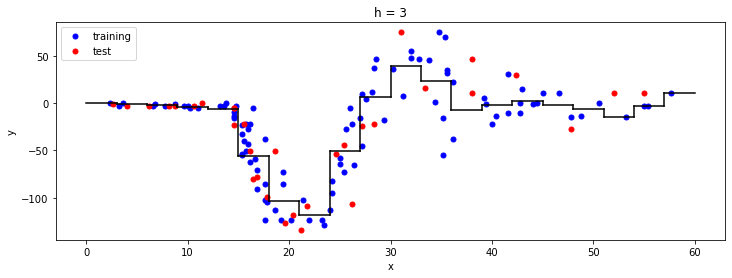

In [14]:
bin_width = 3
left_borders = np.arange(minimum_value, maximum_value, bin_width)
right_borders = np.arange(minimum_value + bin_width, maximum_value + bin_width, bin_width)

p_hat = [np.sum(((left_borders[b] < x_train) & (x_train <= right_borders[b]))* y_train)
        /np.sum((left_borders[b] < x_train) & (x_train <= right_borders[b])) for b in range(len(left_borders))]

fig, ax = plt.subplots(figsize = (12,6))
ax.plot(x_train, y_train, "b.", markersize = 10, label = "training")
ax.plot(x_test, y_test, "r.", markersize = 10, label = "test")
plt.xlabel("x")
plt.ylabel("y")
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels , loc = "upper left")
plt.title("h = 3")

for b in range(len(left_borders)):    
    plt.plot([left_borders[b], right_borders[b]], [p_hat[b], p_hat[b]], "k-")
for b in range(len(left_borders) - 1):
    plt.plot([right_borders[b], right_borders[b]], [p_hat[b], p_hat[b + 1]], "k-")    
plt.show()



In [4]:
N_test = x_test.shape[0]  
y_hat = np.zeros((N_test))
for i in range(N_test):
    for b in range(len(left_borders)):
        if ((left_borders[b] < x_test[i]) & (x_test[i] <= right_borders[b])):
            y_hat[i] = p_hat[b]
            
rmse = np.sqrt(np.sum((y_test-y_hat)**2)/N_test)
print("Regressogram => RMSE is", round(rmse,4), "when h is", bin_width) 



Regressogram => RMSE is 24.726 when h is 3


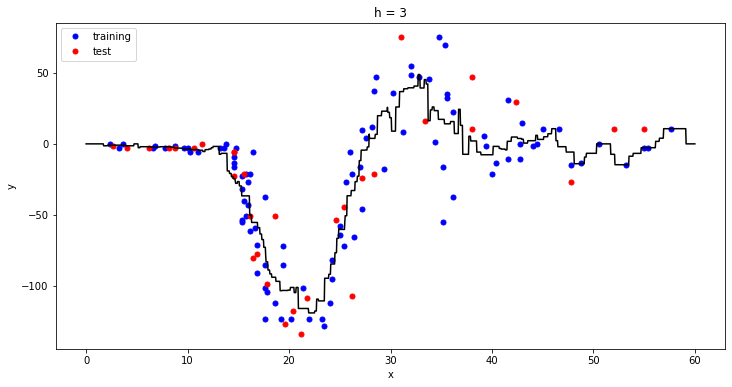

In [5]:
data_interval = np.linspace(minimum_value, maximum_value, 1601)
bin_width = 3
def weird_division(n, d):
    return n / d if d else 0

p2_hat =np.asarray([weird_division(np.sum( (abs((x - x_train)/(bin_width/2)) <1) * y_train ),
                   np.sum( (abs((x - x_train)/(bin_width/2)) <1) ) )     for x in data_interval]) 
fig, ax = plt.subplots(figsize = (12,6))
ax.plot(x_train, y_train, "b.", markersize = 10, label = "training")
ax.plot(x_test, y_test, "r.", markersize = 10, label = "test")
plt.xlabel("x")
plt.ylabel("y")
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels , loc = "upper left")
plt.title("h = 3")
plt.plot(data_interval, p2_hat, "k-")


In [6]:
y2_hat =np.asarray([np.sum( (abs((x - x_train)/(bin_width/2)) <1) * y_train )
                   /np.sum( (abs((x - x_train)/(bin_width/2)) <1) )     for x in x_test]) 
rmse2 = np.sqrt(np.sum((y_test-y2_hat)**2)/N_test)
print("Running Mean Smoother => RMSE is", round(rmse2,4), "when h is", bin_width)   


Running Mean Smoother => RMSE is 23.8403 when h is 3


In [7]:
bin_width = 1.5
a = [np.sum((abs((x - x_train)/bin_width) <1) * y_train) for x in data_interval]
b = np.asarray([np.sum((abs((x - x_train)/bin_width) <1) ) for x in data_interval])
np.set_printoptions(threshold=np.inf)

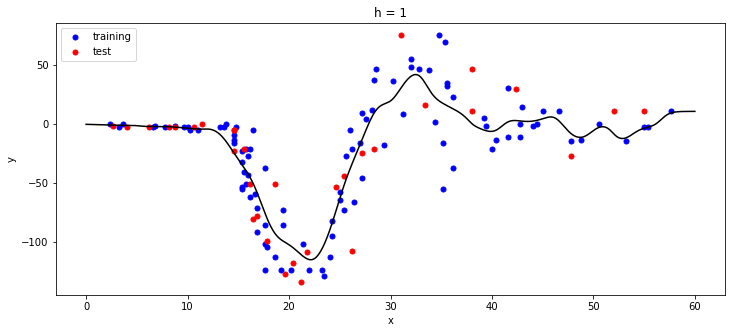

In [8]:
bin_width = 1
p3_hat = np.asarray([np.sum(1 / np.sqrt(2 * math.pi) * np.exp(-0.5 * (x - x_train)**2 / bin_width**2) * y_train) 
                    / np.sum(1 / np.sqrt(2 * math.pi) * np.exp(-0.5 * (x - x_train)**2 / bin_width**2)) for x in data_interval]) 

fig, ax = plt.subplots(figsize = (12,5))
ax.plot(x_train, y_train, "b.", markersize = 10, label = "training")
ax.plot(x_test, y_test, "r.", markersize = 10, label = "test")
plt.xlabel("x")
plt.ylabel("y")
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels , loc = "upper left")
plt.title("h = 1")
plt.plot(data_interval, p3_hat, "k-")


In [9]:
y3_hat =  np.asarray([np.sum(1 / np.sqrt(2 * math.pi) * np.exp(-0.5 * (x - x_train)**2 / bin_width**2) * y_train) 
                    / np.sum(1 / np.sqrt(2 * math.pi) * np.exp(-0.5 * (x - x_train)**2 / bin_width**2)) for x in x_test]) 

rmse3 = np.sqrt(np.sum((y_test-y3_hat)**2)/N_test)
print("Kernel Smoother => RMSE is", round(rmse3,4), "when h is", bin_width) 


Kernel Smoother => RMSE is 24.1672 when h is 1
